<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследование-баланса-классов-и-разбиение-данных-на-выборки" data-toc-modified-id="Исследование-баланса-классов-и-разбиение-данных-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование баланса классов и разбиение данных на выборки</a></span></li><li><span><a href="#Выбор-лучшей-модели-без-учета-дисбаланса-классов" data-toc-modified-id="Выбор-лучшей-модели-без-учета-дисбаланса-классов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Выбор лучшей модели без учета дисбаланса классов</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Применение-гиперпараметра-'class_weight=balanced'" data-toc-modified-id="Применение-гиперпараметра-'class_weight=balanced'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Применение гиперпараметра 'class_weight=balanced'</a></span></li><li><span><a href="#Применение-методики-'upsampling'" data-toc-modified-id="Применение-методики-'upsampling'-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Применение методики 'upsampling'</a></span></li><li><span><a href="#Применение-методики-'downsampling'" data-toc-modified-id="Применение-методики-'downsampling'-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Применение методики 'downsampling'</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование оттока клиента банка 



## Подготовка данных 

In [ ]:
# Импортирум датасет и все необходимые модули для исследования

!pip install scikit-learn==1.1.3

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

Импорт рабочего датасета скрыт в соответствии с политикой конфиденциальности ЯП.

In [2]:
#Проверим данные на наличие/отсутствие пропусков и явных дубликатов:
print(df.info())
print()
print('Количесвто явных дубликатов:', df.duplicated().sum())
print()
print('Количесвто пропусков:', df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None

Количесвто явных дубликатов: 0

Количесвто пропусков: RowNumber            0
CustomerId 

In [3]:
print(df.head()) #Общая структура датасета

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

 **В данных есть пропуски в 10% датасета( в столбце `Tenure`) и отсутствуют явные дубликаты**


In [4]:
#Обработка пропусков в столбце `tenure`
#Заполним пропуски медианой
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
print("Кол-во пропусков в столбце Tenure: = ", df['Tenure'].isna().sum())

Кол-во пропусков в столбце Tenure: =  0


In [5]:
#В данных есть столбцы, которые не влияют на результат исcледования, но могут повлиять на то,
#как модель будет обучаться и потом строить прогнозы. Удалим такие столбцы:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [6]:
df.head(10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


**Вывод:  
Загрузили и исследовали данные, проверили на наличие явных дубликатов и пропусков.  
Устранили пропуски. Удалили признаки, необязательные для работы предсказательной модели.  
Данные готовы для дальнейшей работы.**

## Исследование задачи

### Исследование баланса классов и разбиение данных на выборки

In [7]:
#Исследование дисбаланса классов в целевом признаке:
df.Exited.value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Соотношение классов 0/1 равно 4:1.

**Видим, что процент ухода из банка составляет около 20%, в  то время как оставшихся клиентов 80%. Дисбаланс классов довольно сильный**.


In [8]:
#Разобьем данные на выборки:
features = df.drop('Exited', axis=1)
target = df['Exited']

features_train, features_middle, target_train, target_middle = train_test_split(
    features, target, test_size=0.4, random_state=12345)


features_valid, features_test, target_valid, target_test = train_test_split(
features_middle, target_middle, test_size=0.5, random_state=12345)

#Проверим размер выборок:
print(f'Размер тренировочной выборки = {features_train.shape[0]/len(df):.0%}')
print(f'Размер валидационной выборки = {features_valid.shape[0]/len(df):.0%}')
print(f'Размер тестовой выборки = {features_test.shape[0]/len(df):.0%}')

Размер тренировочной выборки = 60%
Размер валидационной выборки = 20%
Размер тестовой выборки = 20%


In [9]:
#Т.к. в датасете содержатся не только численные признаки, применим прямое кодирование
#к категориальным признакам для каждой из выборок:

#Выборка features_train:
cols = ['Geography', 'Gender'] #названия столбцов, кот.надо привести к численному представлению:

enc = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False) #Создали объект энкодера.

#Cоздание DF из энкодированных данных:                 
features_train_enc = pd.DataFrame(data=enc.fit_transform(features_train[cols]),
                                  columns=enc.get_feature_names_out(cols)) 

#Сбросим индекс у исходного датасета:
features_train = features_train.reset_index(drop=True)
target_train = target_train.reset_index(drop=True)

#Объединим датафрейм с преобразованными столбцами с исходным: 
new_features_train = pd.concat([features_train_enc, features_train], axis=1)
 
#Уберем категориальные столбцы из нового датафрейма:
new_features_train.drop(cols, axis=1, inplace=True) 

#Выведем несколько строк для контроля:
display(new_features_train.head(5))


,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,1.0,1.0,567,35,8.0,153137.74,1,1,0,88659.07
1,0.0,0.0,0.0,711,37,8.0,113899.92,1,0,0,80215.20
2,1.0,0.0,1.0,850,44,3.0,140393.65,2,0,1,186285.52
3,0.0,0.0,1.0,512,24,6.0,0.00,2,1,0,37654.31
4,1.0,0.0,0.0,665,27,2.0,147435.96,1,0,0,187508.06


In [10]:
#Выборка features_valid:

#Cоздание объекта DF:
features_valid_enc = pd.DataFrame(data=enc.transform(features_valid[cols]),
                                  columns=enc.get_feature_names_out(cols))

#Сброс индекса у исходного датафрейма:
features_valid = features_valid.reset_index(drop=True)
target_valid = target_valid.reset_index(drop=True)

#Объединение датафреймов
new_features_valid = pd.concat([features_valid_enc, features_valid], axis=1)

#Уберем категориальные столбцы из нового датафрейма
new_features_valid.drop(cols, axis=1, inplace=True) 

#Выведем несколько строк для контроля:
display(new_features_valid.head(5))


,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,0.0,0.0,585,35,2.0,0.00,2,1,0,98621.04
1,0.0,0.0,0.0,625,45,3.0,0.00,1,1,1,184474.15
2,1.0,0.0,1.0,667,32,0.0,103846.65,1,1,0,20560.69
3,0.0,1.0,0.0,568,36,10.0,153610.61,1,1,1,54083.80
4,0.0,1.0,1.0,606,42,10.0,0.00,2,1,0,177938.52


In [11]:
#Выборка features_test:

#Cоздание объекта DF:
features_test_enc = pd.DataFrame(data=enc.transform(features_test[cols]),
                                  columns=enc.get_feature_names_out(cols))

#Сброс индекса у исходного датафрейма:
features_test = features_test.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)

#Объединение датафреймов
new_features_test = pd.concat([features_test_enc, features_test], axis=1)

#Уберем категориальные столбцы из нового датафрейма
new_features_test.drop(cols, axis=1, inplace=True) 

#Выведем несколько строк для контроля:
display(new_features_test.head(5))

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,0.0,1.0,438,38,2.0,0.00,2,1,0,136859.55
1,0.0,0.0,0.0,644,39,9.0,0.00,1,1,0,3740.93
2,0.0,1.0,1.0,564,31,5.0,121461.87,1,1,1,20432.09
3,0.0,1.0,1.0,628,40,10.0,0.00,2,1,0,103832.58
4,0.0,0.0,1.0,728,30,10.0,114835.43,1,0,1,37662.49


In [12]:
#Приведем небинарные числовые признаки к одному масштабу для дальнейшей работы с моделями Логистической регрессии:
#Создадим независимые копии выборок для Логистической регрессии:

new_features_train_scaled = new_features_train.copy()
new_features_valid_scaled = new_features_valid.copy()


numeric = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']

sc = StandardScaler() #Объект StandardScaler

sc.fit(new_features_train_scaled[numeric])#Настроим на выборке после ohe

new_features_train_scaled[numeric] = sc.fit_transform(new_features_train_scaled[numeric])

new_features_valid_scaled[numeric] = sc.transform(new_features_valid_scaled[numeric])

print(new_features_valid_scaled.head(5))

   Geography_Germany  Geography_Spain  Gender_Male  CreditScore       Age  \
0                0.0              0.0          0.0    -0.699824 -0.373192   
1                0.0              0.0          0.0    -0.284431  0.575842   
2                1.0              0.0          1.0     0.151731 -0.657902   
3                0.0              1.0          0.0    -0.876366 -0.278288   
4                0.0              1.0          1.0    -0.481743  0.291132   

     Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0 -1.101690 -1.233163       0.830152          1               0   
1 -0.737696 -1.233163      -0.891560          1               1   
2 -1.829679  0.438711      -0.891560          1               0   
3  1.810266  1.239884      -0.891560          1               1   
4  1.810266 -1.233163       0.830152          1               0   

   EstimatedSalary  
0        -0.015173  
1         1.471724  
2        -1.367107  
3        -0.786517  
4         1.358533  


**Вывод:  
Разбили данные на выборки и проверили их размерность. Доли размеров train/valid/test 3:1:1.  
Осуществили кодирование категориальных признаков, привели к одному масштабу числовы признаки для работы с Логистической регрессией и создали новые датафреймы c численным представлением категориальных признаков, готовые для работы с моделями.**

### Выбор лучшей модели без учета дисбаланса классов

In [13]:
#Исследуем модель Логистической регрессии:
model_lr = LogisticRegression(random_state = 12345, solver='liblinear', max_iter=100)
model_lr.fit(new_features_train_scaled, target_train)
new_valid_predictions = model_lr.predict(new_features_valid_scaled)
accuracy = accuracy_score(target_valid, new_valid_predictions)

print('accuracy Логистической регрессии на валидационной выборке составляет', accuracy)


accuracy Логистической регрессии на валидационной выборке составляет 0.802


In [14]:
#Проверим accuracy случайной модели Логистической регрессии:
target_pred_constant_lr = pd.Series(0, index=target_valid.index)
accuracy_const_lr = accuracy_score(target_valid, target_pred_constant_lr)
print('accuracy случайной модели на валидационной выборке составляет', accuracy_const_lr)


accuracy случайной модели на валидационной выборке составляет 0.791


In [15]:
#Модель адекватна, найдем для нее f1_score:
f1_score_lr = f1_score(target_valid, new_valid_predictions)
print('f1_score_lr = ',round(f1_score_lr, 2))


f1_score_lr =  0.33


In [16]:
#Исследуем модель Решающего дерева:
#Подберем оптимальную глубину:

best_model_dt=None
best_accuracy=0

for depth in range(1, 9):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model_dt.fit(new_features_train, target_train)
    predictions_valid = model_dt.predict(new_features_valid)
    accuracy = accuracy_score(target_valid, predictions_valid) 
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_dt = model_dt
        
print(f'Лучшая модель: {best_model_dt}, c лучшей accuracy: {best_accuracy}')


Лучшая модель: DecisionTreeClassifier(max_depth=6, random_state=12345), c лучшей accuracy: 0.858


In [17]:
#Проверим accuracy случайной модели Решающего дерева:
target_pred_constant_dt = pd.Series(0, index=target_valid.index)
accuracy_const_dt = accuracy_score(target_valid, target_pred_constant_dt)

print('accuracy случайной модели на валидационной выборке составляет', accuracy_const_dt)


accuracy случайной модели на валидационной выборке составляет 0.791


**Модель прошла проверку на адекватность, однако качество обученной модели не сильно выше качества случайной.
Найдём для нее *f1-меру*.** 

In [18]:
#Модель Решающего дерева:

best_model_dt = DecisionTreeClassifier(max_depth=6, random_state=12345)
best_model_dt.fit(new_features_train, target_train)
best_model_dt_predictions = best_model_dt.predict(new_features_valid)
 
print('f1-мера для лучшей модели решающего дерева =', f1_score(target_valid, best_model_dt_predictions)) 

f1-мера для лучшей модели решающего дерева = 0.5683890577507599


**F1-мера меньше единицы --> данная модель плохо предсказывает положительный класс, это может быть связано с сильным дисбалансом классов в target-признаке.  
Продолжим поиски оптимальной модели.**

In [19]:
# Случайный лес помогает улучшить результат предсказания и избежать переобучения
# Обучим модели случайного леса с количеством деревьев от 1 до 10:
# При max_depth от 1 до 10:

best_model_rf = None

#Будем сразу искать f1-меру, т.к. на примере решающего дерева эта метрика оказалась более говорящей о качестве модели.
best_f1_rf = 0

for est in range(1, 20):
    for depth in range(1, 20):
        #Инициализируем модель случайного леса:
        model_rf = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est)
        #Обучим на тренировочной выборке:
        model_rf.fit(new_features_train, target_train)
        predictions_rf = model_rf.predict(new_features_valid)
        f1_rf = f1_score(target_valid, predictions_rf)
        
        if f1_rf > best_f1_rf:
            best_f1_rf = f1_rf
            best_model_rf = model_rf
            
print(f'Лучшая модель {best_model_rf}| Лучшая f1_score = {best_f1_rf}')  


Лучшая модель RandomForestClassifier(max_depth=15, n_estimators=11, random_state=12345)| Лучшая f1_score = 0.6187050359712231


In [20]:
#Найдем Auc-Roc лучшей модели без учета дисбаланса

probabilities_valid = best_model_rf.predict_proba(new_features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'Метрика Roc-Auc = {auc_roc}')

Метрика Roc-Auc = 0.8345146353413704


**Вывод:  
В ходе исследования задачи на несбалансированной выборке выяснили, что лучшей моделью является модель Случайного леса, с *F1-мерой* = 0.618, и метрикой AUC_ROC = 0.834  
Однако такая величина нас не устраивает, поэтому продолжим работу с данными, применив их улучшение.**

## Борьба с дисбалансом

**В пункте 2 исследования мы увидели, что дисбаланс классов в данных сильно влияет на обучение и конечный
результат работы модели. Поэтому применим несколько способов борьбы с ним и посмотрим, как улучшатся показатели.**


### Применение гиперпараметра 'class_weight=balanced'

In [21]:
#Придадим объектам редкого класса больший вес:

#модель Логистической регрессии:
model_lr_1 = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_lr_1.fit(new_features_train_scaled, target_train)
predicted_valid = model_lr_1.predict(new_features_valid_scaled)
print('F1-score модели Логистической регрессии:',round(f1_score(target_valid, predicted_valid), 2))

F1-score модели Логистической регрессии: 0.49


In [22]:
#найдем лучшую модель Решающего дерева при сбалансированных классах:
best_model = None
f1_dt1=0
for depth in range(1, 11):
    model_dt_1 = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    model_dt_1.fit(new_features_train, target_train)
    predicted_valid_dt_1 = model_dt_1.predict(new_features_valid)
    f1_score_dt_1 = f1_score(target_valid, predicted_valid_dt_1)
    
    if f1_score_dt_1 > f1_dt1:
        f1_dt1 = f1_score_dt_1
        best_model = model_dt_1
print()    
print(f'Лучшая модель {best_model}\nимеет F1-score: {f1_dt1}')

#найдем лучшую модель Случайного леса:

best_model = None
f1_rf1 = 0

for est in range(1, 11):
    for depth in range(1, 11):
        model_rf_1 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model_rf_1.fit(new_features_train, target_train)
        predicted_valid_rf_1 = model_rf_1.predict(new_features_valid)
        f1_score_rf_1 = f1_score(target_valid, predicted_valid_rf_1)
        
        if f1_score_rf_1 > f1_rf1:
            f1_rf1 = f1_score_rf_1
            best_model = model_rf_1
print()            
print(f'Лучшая модель {best_model}\nимеет F1-score: {f1_rf1}')           
        


Лучшая модель DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=12345)
имеет F1-score: 0.5963791267305644

Лучшая модель RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=7,
                       random_state=12345)
имеет F1-score: 0.6217821782178219


In [23]:
#Опредлим AUC-ROC для лучшей модели(случайного леса):

probabilities_valid = best_model.predict_proba(new_features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'Метрика Roc-Auc = {auc_roc}')


Метрика Roc-Auc = 0.8470215159781997


**Вывод:      
Лучшей моделью по-прежнему остается модель Случайного леса c *f1-мерой* = 0.622, и метрикой AUC_ROC = 0.847**


### Применение методики 'upsampling'

In [24]:
#Применим технику увеличения выборки:

#Создадим функцию upsample:
def upsample(features, target, repeat):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [25]:
#Класс 0 относится к классу 1 как 4:1.Т.е для устранения дисбаланса увеличим в 4 раза кол-во элементов класса 1:
features_upsampled, target_upsampled = upsample(new_features_train, target_train, 4)

#То же для Логистической регрессии:
features_upsampled_scaled, target_upsampled_scaled = upsample(new_features_train_scaled, target_train, 4)

#Проверим дисбаланс:
print(target_upsampled.value_counts(normalize=True))
print()
print(target_upsampled_scaled.value_counts(normalize=True))

0    0.501043
1    0.498957
Name: Exited, dtype: float64

0    0.501043
1    0.498957
Name: Exited, dtype: float64


In [26]:
#модель Логистической регрессии:
model_lr_2 = LogisticRegression(random_state=12345, solver='liblinear')
model_lr_2.fit(features_upsampled_scaled, target_upsampled_scaled)
predicted_valid_lr_2 = model_lr_2.predict(new_features_valid_scaled)
print('F1-score модели Логистической регрессии:', f1_score(target_valid, predicted_valid_lr_2))
print()

#модель Решающего дерева:
best_model = None
f1_dt2=0

for depth in range(1, 15):
    model_dt_2 = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_dt_2.fit(features_upsampled, target_upsampled)
    predicted_valid_dt_2 = model_dt_2.predict(new_features_valid)
    f1_score_dt_2 = f1_score(target_valid, predicted_valid_dt_2)
    
    if f1_score_dt_2 > f1_dt2:
        f1_dt2 = f1_score_dt_2
        best_model = model_dt_2
    
print(f'Лучшая модель {best_model}\nимеет F1-score: {f1_dt2}')
print()

#модель Случайного леса:
best_model = None
f1_rf2 = 0

for est in range(1, 11):
    for depth in range(1, 11):
        model_rf_2 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf_2.fit(features_upsampled, target_upsampled)
        predicted_valid_rf_2 = model_rf_2.predict(new_features_valid)
        f1_score_rf_2 = f1_score(target_valid, predicted_valid_rf_2)
        
        if f1_score_rf_2 > f1_rf2:
            f1_rf2 = f1_score_rf_2
            best_model = model_rf_2
            
print(f'Лучшая модель {best_model}\nимеет F1-score: {f1_rf2}')
    

F1-score модели Логистической регрессии: 0.4888507718696398

Лучшая модель DecisionTreeClassifier(max_depth=5, random_state=12345)
имеет F1-score: 0.5963791267305644

Лучшая модель RandomForestClassifier(max_depth=10, n_estimators=10, random_state=12345)
имеет F1-score: 0.6163793103448275


In [27]:
#Опредлим AUC-ROC для лучшей модели(случайного леса):

probabilities_valid = best_model.predict_proba(new_features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'Метрика Roc-Auc = {auc_roc}')

Метрика Roc-Auc = 0.8460771296705157


**Вывод: По сравнению с балансировкой классов, применение *upsampling* увеличило *f1-меру* для всех моделей.  
Наилучшая *f1-мера* по-прежнему у модели Случайного леса и составляет 0.616, а AUC-ROC = 0.846.** 

### Применение методики 'downsampling'

In [28]:
#Применим технику уменьшения выборки:
#Создадим функцию downsample:

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    target_zeros = target[target == 0]
    features_ones = features[target == 1]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled


In [29]:
#Уменьшим в 4 раза кол-во элементов отрицательного класса:
features_downsampled, target_downsampled = downsample(new_features_train, target_train, 0.25)

#То же для Логистической регрессии:
features_downsampled_scaled, target_downsampled_scaled = downsample(new_features_train_scaled, target_train, 0.25)

#Проверим дисбаланс:
print(target_downsampled.value_counts(normalize=True))
print()
print(target_downsampled_scaled.value_counts(normalize=True))


0    0.501043
1    0.498957
Name: Exited, dtype: float64

0    0.501043
1    0.498957
Name: Exited, dtype: float64


In [30]:
#модель Логистической регрессии: 
model_lr_3 = LogisticRegression(random_state=12345, solver='liblinear')
model_lr_3.fit(features_downsampled_scaled, target_downsampled_scaled)
predicted_valid_lr_3 = model_lr_3.predict(new_features_valid_scaled)
print('F1-score модели Логистической регрессии:', f1_score(target_valid, predicted_valid_lr_3))
print()

#модель Решающего дерева:
best_model = None
f1_dt3 = 0

for depth in range(1, 11):
    model_dt_3 = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_dt_3.fit(features_downsampled, target_downsampled)
    predicted_valid_dt_3 = model_dt_3.predict(new_features_valid)
    f1_score_dt_3 = f1_score(target_valid, predicted_valid_dt_3)

    if f1_score_dt_3 > f1_dt3:
        f1_dt3 = f1_score_dt_3
        best_model = model_dt_3
        
print(f'Лучшая модель {best_model}\nимеет F1-score: {f1_dt3}')
print()        

#модель Случайного леса:
best_model = None
f1_rf3 = 0

for est in range(1, 15):
    for depth in range(1, 21):
        model_rf_3 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf_3.fit(features_downsampled, target_downsampled)
        predicted_valid_rf_3 = model_rf_3.predict(new_features_valid)
        f1_score_rf_3 = f1_score(target_valid, predicted_valid_rf_3)

        if f1_score_rf_3 > f1_rf3:
            f1_rf3 = f1_score_rf_3
            best_model = model_rf_3
            
print(f'Лучшая модель {best_model}\nимеет F1-score: {f1_rf3}')

F1-score модели Логистической регрессии: 0.48406546080964685

Лучшая модель DecisionTreeClassifier(max_depth=5, random_state=12345)
имеет F1-score: 0.5928934010152282

Лучшая модель RandomForestClassifier(max_depth=6, n_estimators=12, random_state=12345)
имеет F1-score: 0.6053130929791272


In [31]:
#Найдем ROC-AUC для лучшей модели при применении downsample:
probabilities_valid = best_model.predict_proba(new_features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'Метрика Roc-Auc = {auc_roc}')


Метрика Roc-Auc = 0.8459425413896768


**Вывод:  
При уменьшении выборки наилучший f1_score = 0.605 у модели Случайного леса.  
Метрика ROC-AUC=0.847 у модели Случайного леса.**


**Общий вывод:  
  На сбалансированных данных лучший f1_score = 0,622 оказался у модели Случайного леса при применении параметра 'class_weight=balanced'.  
    При этом лучшая метрика AUC-ROC = 0,846.**

## Тестирование

In [32]:
#Построим график ROC-кривой для лучшей модели Случайного леса из методики class_weight=balanced
#и исследуем метрику AUC-ROC для тестовой выборки:
#Чем выше находится кривая ROC, тем лучше модель предскажет класс 1.

best_model_rf = RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=7,
                       random_state=12345)

#Обучение модели на тренировочной выборке
best_model_rf.fit(new_features_train, target_train)

#F1-score:
predicted_test_best_model_rf = best_model_rf.predict(new_features_test)
F1 = f1_score(target_test, predicted_test_best_model_rf)
print(f'F1_score лучшей модели на тестовой выборке={F1}')
print()

#AUC-ROC:
probabilities_test = best_model_rf.predict_proba(new_features_test)
probabilities_one_test = probabilities_test[:, 1]
AUC_ROC = roc_auc_score(target_test, probabilities_one_test)
print(f'AUC_ROC лучшей модели на тестовой выборке={AUC_ROC}')


F1_score лучшей модели на тестовой выборке=0.587192118226601

AUC_ROC лучшей модели на тестовой выборке=0.8414231768432446


**F1-score на тестовой выборке меньше минимально требуемого 0.59, поэтому улучшим гиперпараметры модели случайного леса на 
валидационных данных, применив "поиск по сетке".**



In [33]:
#Создадим словарь с гиперпараметрами:

grid_space={'max_depth':np.arange(2, 20, 2),
                'n_estimators':np.arange(1, 20, 2),
                'criterion':['gini', 'entropy'],
                'class_weight': ['balanced']
           }

In [40]:
#запустим поиск по сетке:
#инициализируем модель случайного леса 
#на предоставленных данных:

rf = RandomForestClassifier(random_state=12345)

grid = GridSearchCV(
    estimator = rf,
    param_grid=grid_space,
    cv=5, 
    scoring='f1')

model_grid = grid.fit(new_features_train, target_train)

In [42]:
#Найдем лучшие гиперпараметры:

print('Лучшие гиперпараметры: '+ str(model_grid.best_params_))
print()
print('Лучший f1-score: '+ str(round(model_grid.best_score_, 2)))

Лучшие гиперпараметры: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'n_estimators': 19}

Лучший f1-score: 0.61


In [45]:
# обучим модель Случайного леса с лучшими гиперпараметрами и с параметром class_weight = 'balanced'. 
# pасчитаем метрики на тестовой выборке:

#F1-score:
predicted_test_model_grid = model_grid.predict(new_features_test)
F1 = round(f1_score(target_test, predicted_test_model_grid), 2)
print(f'F1_score лучшей модели на тестовой выборке={F1}')
print()

#AUC-ROC:
probabilities_test = model_grid.predict_proba(new_features_test)
probabilities_one_test = probabilities_test[:, 1]
AUC_ROC = roc_auc_score(target_test, probabilities_one_test)

print("ROC_auc:", round(AUC_ROC, 2))


F1_score лучшей модели на тестовой выборке=0.6

ROC_auc: 0.85


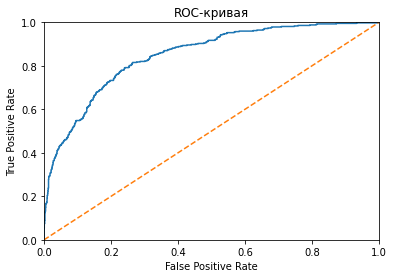

In [37]:
#Построим график AUC-ROC:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

# ROC-кривая случайной модели (оранжевая прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.show()

In [38]:
#Визуально изобразим важность признаков в тестовой выборке.

#Извлечем важность признаков лучшей модели с помощью метода `feature_importances_`:
importances = best_model_rf.feature_importances_

#Создание листа с колонками 
feature_list = list(new_features_test.columns)

#Создадим датафрейм важностью признаков:
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})

#Выведем первые 10 признаков по важности
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,Age,0.412253
1,NumOfProducts,0.295169
2,IsActiveMember,0.073875
3,Balance,0.061835
4,Geography_Germany,0.049630
5,Gender_Male,0.033337
6,EstimatedSalary,0.033209
7,CreditScore,0.024167
8,Tenure,0.012194
9,HasCrCard,0.003121


<AxesSubplot: >

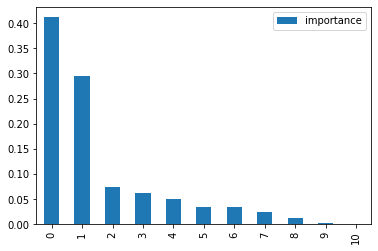

In [39]:
#Визуально изобразим важность признаков:
feature_results.plot(kind='bar')

**Видно, что самым важным индикатором класса в `Tenure` является возраст клиента и количество продуктов банка,  
которыми он пользуется.**

## Общий вывод

В ходе поиска лучшей модели для предсказания оттока клиентов из банка, была проведена следующая работа:

- Датасет исследован на пропуски и дубликаты, пропуски устранены.
- Удалены лишние для работы признаки `RowNumber`, `CustomerId`, `Surname`.
- Исследован баланс классов в целевом признаке. Выявлен дисбаланс.
- Выборка разбита на тренировочную, валидационную и тестовую в соотношении 3:1:1.
- Задача исследована на выборке без учета дисбаланса и показала результаты близкие к результатам случайной модели.
- Для устранения дисбаланса применены три методики: `upsampling`, `downsampling`, и применение гиперпараметра `class_weight='balanced'` внутри моделей.
- В результате лучшим вариантом оказалось использование гиперпараметра class_weight='balanced' внутри моделей.
- Однако метрика лучшей модели Случайного леса F1-score на тестовой выборке не достигла требуемой 0,59, поэтому поторебовался поиск лучших гиперпараметров с помощью `GridSearchCV`:
  - Лучшие гиперпараметры: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'n_estimators': 19}
  - Лучший f1-score =  0.61.
- На тестовой выборке лучшая модель Случайного леса с подобранными "по сетке" гиперпараметрами показала следующие результаты:
 - F1_score = 0.6
 - ROC_auc = 0.85
- Дополнительно построен график ROC-AUC, и показана важность признаков: самыми важными оказался возраст клиентов и кол-во продуктов, которые клиент приобрел ранее.
